# 가설
- 아이템의 카테고리별로 월별 판매량이 다를것이다
- 가게별로 아이템의 평균 가격이 다를것이다.가격에 따라 판매량에 차이가 있을것이다.
- 온라인, 오프라인에 따라 판매량의 차이가 있을것이다.
- 피쳐의 수를 간추리면 성능이 높아질 것이다.

# Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from googletrans import Translator 

In [2]:
df_test = ("../files/test.csv")
df_train = ("../files/sales_train_v2.csv")

df_test = pd.read_csv(df_test, sep = ",") #(214200, 3)_
df_train = pd.read_csv(df_train, sep = ",") # (2935849, 6)
df_train['index'] = df_train.index
df_test['index'] = df_test.index

In [3]:
df_items = ("../files/items.csv")
df_item_categories = ("../files/item_categories.csv")
df_shops = ("../files/shops.csv")

df_items = pd.read_csv(df_items, sep = ",") #(214200, 3)
df_item_categories = pd.read_csv(df_item_categories, sep = ",") # (2935849, 6) 
df_shops = pd.read_csv(df_shops, sep = ",") #(214200, 3)

In [4]:
df_train.isnull().sum() #no null
df_test.isnull().sum() #no null

ID         0
shop_id    0
item_id    0
index      0
dtype: int64

In [5]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,index
0,02.01.2013,0,59,22154,999.00,1.0,0
1,03.01.2013,0,25,2552,899.00,1.0,1
2,05.01.2013,0,25,2552,899.00,-1.0,2
3,06.01.2013,0,25,2554,1709.05,1.0,3
4,15.01.2013,0,25,2555,1099.00,1.0,4


In [6]:
df_test.head()

,ID,shop_id,item_id,index
0,0,5,5037,0
1,1,5,5320,1
2,2,5,5233,2
3,3,5,5232,3
4,4,5,5268,4


In [7]:
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


# Translate

- 물건 카테고리이름, 상점이름등은 중요한 피쳐라 생각해 해석한 뒤 전처리하였다.


- 아이템명은 중복을 제외하고 약 20000개정도의 값을 가짐. 불필요한 정보라 생각해 드롭하였다. 


- 데이터프레임끼리 merge 하는것이 편집하기 편하기 때문에 아이템명은 드롭하지 않은 상태.



In [9]:
translator = Translator()
item_category_name_ko = pd.Series([str(translator.translate(category_name, dest = "ko").text) for category_name in df_item_categories.item_category_name])
df_item_categories.item_category_name = item_category_name_ko
df_item_categories.item_category_name


shop_name_ko = pd.Series([str(translator.translate(shop_nm, dest = "ko").text) for shop_nm in df_shops.shop_name])
df_shops.shop_name = shop_name_ko
df_shops.shop_name

0                        Yakutsk Ordzhonikidze, 56 프랑
1                                     야쿠 츠크 TC "중앙"프랑
2                                  아디 게아 쇼핑 센터 "Mega"
3                              발라 시카 TRK "10 월 키노 미르"
4            볼츠키 (Volzhsky) 쇼핑 센터 "볼가 몰 (Volga Mall)"
5                       볼 로그 다 쇼핑 및 엔터테인먼트 센터 "마멀레이드"
6                          보로 네즈 (Porkhanovskaya, 13)
7                                Voronezh TRC "막시 미르"
8                            Voronezh TRC 도시 공원 "졸업생"
9                                               외환 거래
10                          Zhukovsky Str. 차 칼로프 39m?
11                       Zhukovsky Str. Chkalov 39 m²
12                                       온라인 상점 비상 사태
13                                    카잔 TC "Bahetle"
14                                   카잔 TC "파크 하우스"II
15                                   칼루가 TRC "XXI 세기"
16                                          콜로세움 "리오"
17    크라스 노야 르 스크 (Krasnoyarsk) 쇼핑 센터 "Vzletka Plaza"
18             크라스 노야 르 스크 (

# Simplify Categories 
- shopid의 인덱스를 줄여여주기위해 지역별, 동부 서부 중부 기타로 인덱스를 변경

In [10]:
def split_words(df_col_values):
    tokenized = [i.split(" ") for i in df_col_values]
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    
    for i in range(len(df_col_values)):
        df_col_values[i] = tokenized[i][0] if hangul.sub('',tokenized[i][0]) else "기타"
    return df_col_values

df_item_category= pd.DataFrame({"item_category_id" : df_item_categories.item_category_name.index, "new_item_category_name": split_words(df_item_categories.item_category_name.values)})
df_item_category

,item_category_id,new_item_category_name
0,0,기타
1,1,액세서리
2,2,액세서리
3,3,액세서리
4,4,액세서리
5,5,액세서리
6,6,액세서리
7,7,액세서리
8,8,티켓
9,9,상품


#  add city info

In [11]:
# df_shops['location'] = None
# df_shops.loc[0:1,'location'] = '야쿠츠크'
# df_shops.loc[20:33,'location'] = '모스크바'
# df_shops.loc[2,'location'] = '아디게아'
# df_shops.loc[3,'location'] ='발라시카' 
# df_shops.loc[4,'location'] = '볼츠키'
# df_shops.loc[5,'location'] = '볼로그다'
# df_shops.loc[6:8,'location'] = '보로네시'
# df_shops.loc[9,'location'] = '기타'
# df_shops.loc[10:11,'location'] = '기타'
# df_shops.loc[12,'location'] = '기타'
# df_shops.loc[13:14,'location'] = '카잔'
# df_shops.loc[15,'location'] = '칼루가'
# df_shops.loc[16,'location'] = '기타'
# df_shops.loc[17:18,'location'] = '크라스노야르스크'
# df_shops.loc[34:35,'location'] = '노브고로드'
# df_shops.loc[19,'location'] = '쿠르스크'
# df_shops.loc[36:37,'location'] ='노보시비르스크'
# df_shops.loc[38,'location']='옴스크'
# df_shops.loc[39:41,'location']='로스토프나도누'
# df_shops.loc[42:43,'location']='상트페테르부르크'
# df_shops.loc[44:45,'location']='사마라'
# df_shops.loc[46,'location']='세르기예프 포사트'
# df_shops.loc[47,'location']='수르구트'
# df_shops.loc[48,'location']='톰스크'
# df_shops.loc[49:51,'location']='튜멘'
# df_shops.loc[52:53,'location']='우파'
# df_shops.loc[54,'location']='힘키'
# df_shops.loc[55:56,'location']='기타'
# df_shops.loc[57:58,'location']= '야쿠츠크'
# df_shops.loc[59,'location']='야로슬라블'


# Add direction info

In [12]:
df_shops['direction'] = None
df_shops.loc[0:1,'direction'] = '동부'
df_shops.loc[20:33,'direction'] = '서부'
df_shops.loc[2,'direction'] = '서부'
df_shops.loc[3,'direction'] ='서부' 
df_shops.loc[4,'direction'] = '서부'
df_shops.loc[5,'direction'] = '서부'
df_shops.loc[6:8,'direction'] = '서부'
df_shops.loc[9,'direction'] = '기타'
df_shops.loc[10:11,'direction'] = '기타'
df_shops.loc[12,'direction'] = '기타'
df_shops.loc[13:14,'direction'] = '서부'
df_shops.loc[15,'direction'] = '서부'
df_shops.loc[16,'direction'] = '기타'
df_shops.loc[17:18,'direction'] = '중부'
df_shops.loc[34:35,'direction'] = '서부'
df_shops.loc[19,'direction'] = '서부'
df_shops.loc[36:37,'direction'] ='중부'
df_shops.loc[38,'direction']='중부'
df_shops.loc[39:41,'direction']='서부'
df_shops.loc[42:43,'direction']='서부'
df_shops.loc[44:45,'direction']='서부'
df_shops.loc[46,'direction']='서부'
df_shops.loc[47,'direction']='중부'
df_shops.loc[48,'direction']='중부'
df_shops.loc[49:51,'direction']='중부'
df_shops.loc[52:53,'direction']='서부'
df_shops.loc[54,'direction']='서부'
df_shops.loc[55:56,'direction']='기타'
df_shops.loc[57:58,'direction']= '동부'
df_shops.loc[59,'direction']='서부'
df_shops

,shop_name,shop_id,direction
0,"Yakutsk Ordzhonikidze, 56 프랑",0,동부
1,"야쿠 츠크 TC ""중앙""프랑",1,동부
2,"아디 게아 쇼핑 센터 ""Mega""",2,서부
3,"발라 시카 TRK ""10 월 키노 미르""",3,서부
4,"볼츠키 (Volzhsky) 쇼핑 센터 ""볼가 몰 (Volga Mall)""",4,서부
5,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드""",5,서부
6,"보로 네즈 (Porkhanovskaya, 13)",6,서부
7,"Voronezh TRC ""막시 미르""",7,서부
8,"Voronezh TRC 도시 공원 ""졸업생""",8,서부
9,외환 거래,9,기타


# Merge & Drop

- 이제 정제된 데이터들만 갖고가기 위해 Merge, Drop 해 주었다.


In [13]:
#아이템카테고리 id만 df_train,df_test에 존재 -> items + item_categories -> df_train + item_info
df_item_info = pd.merge(df_item_category, df_items, on = "item_category_id")
df_item_info.head(5)

,item_category_id,new_item_category_name,item_name,item_id
0,0,기타,PC: Гарнитура HyperX Cloud Core игровая стерео...,5441
1,0,기타,Наушники PHILIPS SBC HC8680,16255
2,0,기타,Наушники RITMIX RH-120,16256
3,0,기타,Наушники RITMIX RH-124 Black,16257
4,1,액세서리,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb...,5606


In [14]:
del df_item_info["item_name"] #item_name의 데이터는 너무 방대함 -> 카테고리로 충분하다 판단

In [15]:
df_item_info.head(5)

,item_category_id,new_item_category_name,item_id
0,0,기타,5441
1,0,기타,16255
2,0,기타,16256
3,0,기타,16257
4,1,액세서리,5606


In [16]:
df_train = pd.merge(df_train,df_item_info,on = "item_id")
df_test = pd.merge(df_test,df_item_info,on = "item_id")

In [17]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,index,item_category_id,new_item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,0,37,시네마
1,23.01.2013,0,24,22154,999.0,1.0,3270,37,시네마
2,20.01.2013,0,27,22154,999.0,1.0,17081,37,시네마
3,02.01.2013,0,25,22154,999.0,1.0,25918,37,시네마
4,03.01.2013,0,25,22154,999.0,1.0,25919,37,시네마


In [18]:
df_test.head()

,ID,shop_id,item_id,index,item_category_id,new_item_category_name
0,0,5,5037,0,19,게임
1,5100,4,5037,5100,19,게임
2,10200,6,5037,10200,19,게임
3,15300,3,5037,15300,19,게임
4,20400,2,5037,20400,19,게임


In [19]:
df_train = pd.merge(df_train, df_shops, on = "shop_id")
df_test = pd.merge(df_test, df_shops, on = "shop_id")

In [20]:
df_test.head()

,ID,shop_id,item_id,index,item_category_id,new_item_category_name,shop_name,direction
0,0,5,5037,0,19,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드""",서부
1,1,5,5320,1,55,음악,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드""",서부
2,2,5,5233,2,19,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드""",서부
3,3,5,5232,3,23,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드""",서부
4,4,5,5268,4,20,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드""",서부


In [21]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,index,item_category_id,new_item_category_name,shop_name,direction
0,02.01.2013,0,59,22154,999.0,1.0,0,37,시네마,"야로 슬라 블 쇼핑 센터 ""Altair""",서부
1,16.05.2013,4,59,2573,249.0,1.0,498629,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",서부
2,26.01.2013,0,59,2574,399.0,1.0,77959,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",서부
3,09.01.2013,0,59,2574,399.0,1.0,77961,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",서부
4,24.02.2013,1,59,2574,399.0,1.0,133013,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",서부


# Direction To Shop Id

In [22]:
df_train["shop_id"] = df_train["direction"]
df_test["shop_id"] = df_test["direction"]
del df_test["direction"]
del df_train["direction"]

In [23]:
df_test

,ID,shop_id,item_id,index,item_category_id,new_item_category_name,shop_name
0,0,서부,5037,0,19,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
1,1,서부,5320,1,55,음악,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
2,2,서부,5233,2,19,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
3,3,서부,5232,3,23,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
4,4,서부,5268,4,20,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
5,5,서부,5039,5,23,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
6,6,서부,5041,6,20,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
7,7,서부,5046,7,55,음악,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
8,8,서부,5319,8,55,음악,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""
9,9,서부,5003,9,20,게임,"볼 로그 다 쇼핑 및 엔터테인먼트 센터 ""마멀레이드"""


In [24]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,index,item_category_id,new_item_category_name,shop_name
0,02.01.2013,0,서부,22154,999.0,1.0,0,37,시네마,"야로 슬라 블 쇼핑 센터 ""Altair"""
1,16.05.2013,4,서부,2573,249.0,1.0,498629,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""
2,26.01.2013,0,서부,2574,399.0,1.0,77959,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""
3,09.01.2013,0,서부,2574,399.0,1.0,77961,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""
4,24.02.2013,1,서부,2574,399.0,1.0,133013,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""
5,29.03.2013,2,서부,2574,399.0,1.0,334238,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""
6,19.07.2013,6,서부,2574,399.0,1.0,706298,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""
7,03.07.2013,6,서부,2574,399.0,1.0,706299,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""
8,06.07.2013,6,서부,2574,399.0,1.0,706307,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""
9,28.08.2013,7,서부,2574,399.0,1.0,736350,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair"""


# Price Rank Per Shops and Items

- 가격정보는 명목형 값이므로 최소화해야한다는 생각을 하였다.


- 한 아이템내의 가격을 sort 한 뒤 오름차순으로 등수를 매겼다.



- 딕트타입으로 row 의 인덱스값을 키값, 등수를 매긴 가격정보를 밸류값으로 저장한 뒤 데이터프레임 생성

In [25]:
df_grouped = df_train.groupby(["shop_id","item_category_id","item_id"])["item_price"].apply(list)
#같은 제품에 있는 가격들을 list로 묶음
ranked_price_mat = []
for price_list in df_grouped.values:
    ranked_price_dict = {}
    ranked_price = {price : no  for no,price in enumerate(sorted(np.unique(price_list)))}
    ranked_price_dict.update(ranked_price)
    ranked_price_mat.append(ranked_price_dict)
    
# 가격에 따라 enumerate로 등수를 매김, 현재 가격과 등수가 각각 dict값의 키와 밸류로 저장되어있음

for value_no in range(len(df_grouped.values)): 
    for index in range(len(df_grouped.values[value_no])):
        df_grouped.values[value_no][index] = ranked_price_mat[value_no][df_grouped.values[value_no][index]]
        
    #df_grouped에 변경사항 반영

df_get_back = df_train.groupby(["shop_id","item_category_id","item_id"])["index"].apply(list)
get_back_dict = {}
for value_no in range(len(df_grouped.values)): 
    for index in range(len(df_grouped.values[value_no])):
        get_back_dict.update({df_get_back.values[value_no][index] : df_grouped.values[value_no][index]+1})
        
    #item_price를 원래대로 돌리기 위해 index값을 똑같이 묶은 뒤 딕트타입으로 키값에 인덱스번호를 부여
    #그리고 enumerate한 등수가 0이되지 않도록 1을 더해줌. {인덱스값 : 가격} 형태의 딕트 완성
        
df_ranked = pd.DataFrame(list(get_back_dict.items()),columns=['index','new_item_price'])
df_ranked = pd.merge(df_train,df_ranked, on = "index")

In [26]:
df_ranked

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,index,item_category_id,new_item_category_name,shop_name,new_item_price
0,02.01.2013,0,서부,22154,999.0,1.0,0,37,시네마,"야로 슬라 블 쇼핑 센터 ""Altair""",2
1,16.05.2013,4,서부,2573,249.0,1.0,498629,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",2
2,26.01.2013,0,서부,2574,399.0,1.0,77959,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",14
3,09.01.2013,0,서부,2574,399.0,1.0,77961,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",14
4,24.02.2013,1,서부,2574,399.0,1.0,133013,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",14
5,29.03.2013,2,서부,2574,399.0,1.0,334238,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",14
6,19.07.2013,6,서부,2574,399.0,1.0,706298,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",14
7,03.07.2013,6,서부,2574,399.0,1.0,706299,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",14
8,06.07.2013,6,서부,2574,399.0,1.0,706307,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",14
9,28.08.2013,7,서부,2574,399.0,1.0,736350,55,음악,"야로 슬라 블 쇼핑 센터 ""Altair""",14


In [27]:
df_ranked.isnull().sum()

date                      0
date_block_num            0
shop_id                   0
item_id                   0
item_price                0
item_cnt_day              0
index                     0
item_category_id          0
new_item_category_name    0
shop_name                 0
new_item_price            0
dtype: int64

In [28]:
df_ranked_light = df_ranked.drop(["date","date_block_num","item_id","item_price","item_cnt_day","index","item_category_id","shop_id"], axis = 1)

df_mean_price_rank_shop = df_ranked_light.groupby(["shop_name"], as_index = False)["new_item_price"].mean() #null 0
 
df_std_price_rank_shop = df_ranked_light.groupby(["shop_name"], as_index = True)["new_item_price"].std() #null 0
df_std_price_rank_shop = pd.DataFrame({"shop_name" : df_std_price_rank_shop.index, "new_item_price" : df_std_price_rank_shop.values})

df_mean_price_rank_item = df_ranked_light.groupby(["new_item_category_name"], as_index = False)["new_item_price"].mean().fillna(1) #null 2, mode 1
df_std_price_rank_item = df_ranked_light.groupby(["new_item_category_name"], as_index = True)["new_item_price"].std().fillna(0) #null 2 mode 0
df_std_price_rank_item = pd.DataFrame({"new_item_category_name" :df_std_price_rank_item.index, "df_std_price_rank_item" : df_std_price_rank_item.values})

In [29]:
df_mean_price_rank_shop

,shop_name,new_item_price
0,"Khimki ТЦ ""메가""",11.927809
1,"Mytischi TRK ""XL-3""",22.540481
2,"N.Novgorod TRC ""RIO""",25.416029
3,"RostovNaDon TRK ""Megacenter Horizon""",19.978795
4,"RostovNaDonu TC ""메가""",17.739176
5,"RostovNaDonu TRC ""Megacenter Horizon""Island",18.269439
6,"SPb TC ""넵 스키 센터""",14.400373
7,"SPb TK ""센나 야""",18.659590
8,"Surgut 쇼핑 및 엔터테인먼트 센터 ""City Mall""",9.025840
9,"Tyumen SEC ""크리스탈""",9.235535


In [30]:
# df_mean_price_rank_shop.isnull().sum()
# df_std_price_rank_shop.isnull().sum()
# df_mean_price_rank_item.isnull().sum()
# df_std_price_rank_item.isnull().sum()
# df_rowest_gap_price_item["new_item_price"].mode()

In [31]:
df_price_rank_per_shop = pd.merge(df_mean_price_rank_shop,df_std_price_rank_shop, on = "shop_name")
df_price_rank_per_shop = df_price_rank_per_shop.rename(index = str, columns ={"shop_name":"shop_name","new_item_price_x" : "mean_price_rank_shop","new_item_price_y" : "std_price_rank_shop"})

In [32]:
df_price_rank_per_shop

,shop_name,mean_price_rank_shop,std_price_rank_shop
0,"Khimki ТЦ ""메가""",11.927809,32.252748
1,"Mytischi TRK ""XL-3""",22.540481,81.080647
2,"N.Novgorod TRC ""RIO""",25.416029,98.453609
3,"RostovNaDon TRK ""Megacenter Horizon""",19.978795,74.750293
4,"RostovNaDonu TC ""메가""",17.739176,47.061304
5,"RostovNaDonu TRC ""Megacenter Horizon""Island",18.269439,39.738962
6,"SPb TC ""넵 스키 센터""",14.400373,51.100049
7,"SPb TK ""센나 야""",18.659590,52.295847
8,"Surgut 쇼핑 및 엔터테인먼트 센터 ""City Mall""",9.025840,15.371056
9,"Tyumen SEC ""크리스탈""",9.235535,18.593437


In [33]:
df_price_rank_per_item = pd.merge(df_std_price_rank_item, df_mean_price_rank_item, on = "new_item_category_name")
df_price_rank_per_item = df_price_rank_per_item.rename(index = str, columns ={"df_std_price_rank_item":"std_price_rank_item","new_item_category_name" : "new_item_category_name","new_item_price" : "mean_price_rank_item"})
# del df_std_price_rank_item
# del df_mean_price_rank_item

In [34]:
df_price_rank_per_item

,std_price_rank_item,new_item_category_name,mean_price_rank_item
0,22.385881,게임,17.089486
1,0.600003,공식,1.687547
2,23.587663,기타,20.780992
3,1.877945,도서,2.980429
4,430.590140,사무실,562.766406
5,108.195249,상품,153.771546
6,17.253191,선물,10.052042
7,13.219947,시네마,9.404576
8,9.521016,액세서리,11.511136
9,4.440890,영화,5.142847


In [35]:
df_price_rank_per_shop

,shop_name,mean_price_rank_shop,std_price_rank_shop
0,"Khimki ТЦ ""메가""",11.927809,32.252748
1,"Mytischi TRK ""XL-3""",22.540481,81.080647
2,"N.Novgorod TRC ""RIO""",25.416029,98.453609
3,"RostovNaDon TRK ""Megacenter Horizon""",19.978795,74.750293
4,"RostovNaDonu TC ""메가""",17.739176,47.061304
5,"RostovNaDonu TRC ""Megacenter Horizon""Island",18.269439,39.738962
6,"SPb TC ""넵 스키 센터""",14.400373,51.100049
7,"SPb TK ""센나 야""",18.659590,52.295847
8,"Surgut 쇼핑 및 엔터테인먼트 센터 ""City Mall""",9.025840,15.371056
9,"Tyumen SEC ""크리스탈""",9.235535,18.593437


In [36]:
df_train = pd.merge(df_price_rank_per_item, df_train, on = "new_item_category_name")
df_train = pd.merge(df_price_rank_per_shop, df_train, on = "shop_name")

In [37]:
df_test = pd.merge(df_price_rank_per_item, df_test, on = "new_item_category_name")
df_test= pd.merge(df_price_rank_per_shop, df_test, on = "shop_name")

In [38]:
del df_train["shop_name"]
del df_test["shop_name"]

del df_test["index"]
del df_train["index"]

del df_train["item_category_id"]
del df_test["item_category_id"]

del df_train["item_price"]

In [39]:
df_train["item_id"] = df_train["new_item_category_name"]
df_test["item_id"] = df_test["new_item_category_name"]
del df_train["new_item_category_name"]
del df_test["new_item_category_name"]

In [40]:
del df_train['date']
del df_train['date_block_num'] 

In [41]:
df_train

,mean_price_rank_shop,std_price_rank_shop,std_price_rank_item,mean_price_rank_item,shop_id,item_id,item_cnt_day
0,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
1,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
2,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
3,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
4,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
5,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
6,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
7,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
8,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0
9,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0


In [42]:
df_test

,mean_price_rank_shop,std_price_rank_shop,std_price_rank_item,mean_price_rank_item,ID,shop_id,item_id
0,25.416029,98.453609,22.385881,17.089486,183600,서부,게임
1,25.416029,98.453609,22.385881,17.089486,183602,서부,게임
2,25.416029,98.453609,22.385881,17.089486,183603,서부,게임
3,25.416029,98.453609,22.385881,17.089486,183604,서부,게임
4,25.416029,98.453609,22.385881,17.089486,183605,서부,게임
5,25.416029,98.453609,22.385881,17.089486,183606,서부,게임
6,25.416029,98.453609,22.385881,17.089486,183609,서부,게임
7,25.416029,98.453609,22.385881,17.089486,183611,서부,게임
8,25.416029,98.453609,22.385881,17.089486,183613,서부,게임
9,25.416029,98.453609,22.385881,17.089486,183614,서부,게임


In [43]:
df_train.columns

Index(['mean_price_rank_shop', 'std_price_rank_shop', 'std_price_rank_item',
       'mean_price_rank_item', 'shop_id', 'item_id', 'item_cnt_day'],
      dtype='object')

In [44]:
df_test.columns

Index(['mean_price_rank_shop', 'std_price_rank_shop', 'std_price_rank_item',
       'mean_price_rank_item', 'ID', 'shop_id', 'item_id'],
      dtype='object')

In [45]:
y_data = df_train.pop("item_cnt_day")
ID = df_test.pop("ID")
x_data = df_train
x_predict = df_test

In [46]:
# print(len(df_train))
df_all = pd.concat([df_train,df_test])
df_all, len(df_train)

(        mean_price_rank_shop  std_price_rank_shop  std_price_rank_item  \
 0                  11.927809            32.252748            22.385881   
 1                  11.927809            32.252748            22.385881   
 2                  11.927809            32.252748            22.385881   
 3                  11.927809            32.252748            22.385881   
 4                  11.927809            32.252748            22.385881   
 5                  11.927809            32.252748            22.385881   
 6                  11.927809            32.252748            22.385881   
 7                  11.927809            32.252748            22.385881   
 8                  11.927809            32.252748            22.385881   
 9                  11.927809            32.252748            22.385881   
 10                 11.927809            32.252748            22.385881   
 11                 11.927809            32.252748            22.385881   
 12                 11.92

In [47]:
df_all = pd.get_dummies(df_all)
df_all

,mean_price_rank_shop,std_price_rank_shop,std_price_rank_item,mean_price_rank_item,shop_id_기타,shop_id_동부,shop_id_서부,shop_id_중부,item_id_게임,item_id_공식,...,item_id_시네마,item_id_액세서리,item_id_영화,item_id_음식,item_id_음악,item_id_지불,item_id_책,item_id_클린,item_id_티켓,item_id_프로그램
0,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,11.927809,32.252748,22.385881,17.089486,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
x_data = df_all.iloc[:2935849,:].as_matrix()
x_predict = df_all.iloc[2935849:,:].as_matrix()
y_data = y_data.as_matrix().reshape(-1,1)
x_data.shape,y_data.shape

((2935849, 25), (2935849, 1))

In [49]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)
x_predict = min_max_scaler.fit_transform(x_predict)
df_all = min_max_scaler.fit_transform(df_all)

In [50]:
df_all

array([[0.41649975, 0.30593714, 0.05066599, ..., 0.        , 0.        ,
        0.        ],
       [0.41649975, 0.30593714, 0.05066599, ..., 0.        , 0.        ,
        0.        ],
       [0.41649975, 0.30593714, 0.05066599, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25007756, 0.09516096, 0.03415162, ..., 0.        , 0.        ,
        1.        ],
       [0.25007756, 0.09516096, 0.03415162, ..., 0.        , 0.        ,
        1.        ],
       [0.25007756, 0.09516096, 0.03415162, ..., 0.        , 0.        ,
        1.        ]])

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x_data = df_all[:2935849,:]
x_predict = df_all[2935849:,:]

x_train,x_test = x_data[0:round(len(x_data)*0.8)],x_data[round(len(x_data)*0.8):]
y_train,y_test = y_data[0:round(len(y_data)*0.8)],y_data[round(len(y_data)*0.8):] 

regr =linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[-8.17448904e-01  4.84182991e-01  8.46098271e+09  4.63986616e+10
   5.94457772e+08  5.94457771e+08  5.94457771e+08  5.94457771e+08
  -1.66265216e+09  3.97020564e+07 -1.99157047e+09 -9.23595997e+07
  -5.48199423e+10 -1.46541191e+10 -9.79690889e+08 -8.46785618e+08
  -9.48204090e+08 -3.21613215e+08 -4.55605193e+08 -1.46060989e+08
  -1.75518228e+09 -6.57624805e+07 -1.08527869e+07 -7.22302595e+07
  -1.13402408e+09]]
Mean squared error: 1.53
Variance score: -0.03


ValueError: x and y must be the same size

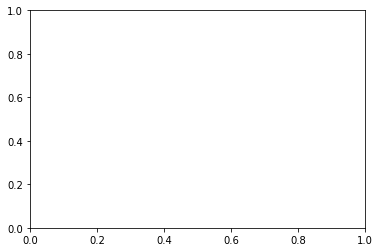

In [72]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

If Drop city  Info

Coefficients: 
 [[-8.17448904e-01  4.84182991e-01  8.46098271e+09  4.63986616e+10
   5.94457772e+08  5.94457771e+08  5.94457771e+08  5.94457771e+08
  -1.66265216e+09  3.97020564e+07 -1.99157047e+09 -9.23595997e+07
  -5.48199423e+10 -1.46541191e+10 -9.79690889e+08 -8.46785618e+08
  -9.48204090e+08 -3.21613215e+08 -4.55605193e+08 -1.46060989e+08
  -1.75518228e+09 -6.57624805e+07 -1.08527869e+07 -7.22302595e+07
  -1.13402408e+09]]
Mean squared error: 1.53
Variance score: -0.03

In [301]:
df_train

,mean_price_rank_shop,std_price_rank_shop,std_price_rank_item,mean_price_rank_item,shop_id,item_id,item_cnt_day,location
0,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
1,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
2,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
3,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
4,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
5,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
6,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
7,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
8,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키
9,11.927809,32.252748,22.385881,17.089486,서부,게임,1.0,힘키


In [203]:
# y_data = df_train.pop("item_cnt_day")
# x_data = df_train

In [204]:
d

,shop_id,item_id,location,mean_price_rank_shop,std_price_rank_shop,std_price_rank_item,mean_price_rank_item
0,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
1,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
2,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
3,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
4,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
5,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
6,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
7,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
8,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946
9,서부,게임,노브고로드,1.933762,2.626648,3.857303,3.952946


In [205]:
x_data.columns

Index(['mean_price_rank_shop', 'std_price_rank_shop', 'std_price_rank_item',
       'mean_price_rank_item', 'shop_id', 'item_id', 'location'],
      dtype='object')

In [206]:
len(x_data.columns), len(x_predict.columns)

(7, 7)

In [210]:
len(x_data),len(x_predict)

(2935849, 214200)

In [211]:
df_all = pd.concat([x_data,x_predict])
df_all = pd.get_dummies(df_all)

In [212]:
df_all

,mean_price_rank_item,mean_price_rank_shop,std_price_rank_item,std_price_rank_shop,item_id_게임,item_id_공식,item_id_기타,item_id_도서,item_id_사무실,item_id_상품,...,shop_id_54,shop_id_55,shop_id_56,shop_id_57,shop_id_58,shop_id_59,shop_id_기타,shop_id_동부,shop_id_서부,shop_id_중부
0,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,3.952946,2.605631,3.857303,3.517549,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
